In [1]:
!rm -rf /kaggle/working/p30gnn
!rm -rf /kaggle/working/*
!git clone -b data-augmentation --single-branch \
https://github.com/oskareriksandelin/p30gnn.git

Cloning into 'p30gnn'...
remote: Enumerating objects: 177, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 177 (delta 11), reused 20 (delta 10), pack-reused 136 (from 1)
Receiving objects: 100% (177/177), 705.89 KiB | 3.70 MiB/s, done.
Resolving deltas: 100% (52/52), done.


In [2]:
!pip install torch_geometric

In [3]:
!pwd
!ls


/kaggle/working
p30gnn


## LOAD THE DATA

In [4]:
!pip -q install gdown   

In [5]:
import gdown

In [6]:
folder_url = "https://drive.google.com/drive/folders/1y10KJqDBL5RhETXMChe48e93Q0oubGHn?usp=drive_link"
gdown.download_folder(folder_url, output="data", quiet=False, remaining_ok=True)

Retrieving folder contents


Processing file 19HVQoNILBqnfv7vvSdcTXirFptHNVlVX FeGd_data_POSCAR_2.zip
Processing file 15lcB99k6cYbt0HGnQj_g8QXtb3N2nCFT FeGd_data_POSCAR_3.zip
Processing file 1f__wyGmIioGC9WfimVaypb6HrmuJ06vq FeGd_data_POSCAR_4.zip
Processing file 1OmYIMRib6yYpWmxcagvhKVUVHJfoiVwh FeGd_data_POSCAR_5.zip
Processing file 1x71MDnwVG6QQ4Nm9Gan6Y2uUo3TDoIFG FeGd_data_POSCAR_6.zip
Processing file 1F4OvZB1U2P1OEOxvGdr_-6CnbpVpjrRi FeGd_data_POSCAR_7.zip
Processing file 1ybzjthY_8ZHUOzcjQ62Du9v24EW4Azct FeGd_data_POSCAR_8.zip
Processing file 1baE5wY5rFIQERD0l2tJFBK2vCtyQ2c5x FeGd_data_POSCAR_9.zip


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=19HVQoNILBqnfv7vvSdcTXirFptHNVlVX
From (redirected): https://drive.google.com/uc?id=19HVQoNILBqnfv7vvSdcTXirFptHNVlVX&confirm=t&uuid=6ad15b8e-dffc-408a-813b-c6e23750cd79
To: /kaggle/working/data/FeGd_data_POSCAR_2.zip
100%|██████████| 278M/278M [00:09<00:00, 29.6MB/s] 
Downloading...
From (original): https://drive.google.com/uc?id=15lcB99k6cYbt0HGnQj_g8QXtb3N2nCFT
From (redirected): https://drive.google.com/uc?id=15lcB99k6cYbt0HGnQj_g8QXtb3N2nCFT&confirm=t&uuid=2a98d97f-74b8-421c-a122-4ee2957f0d2b
To: /kaggle/working/data/FeGd_data_POSCAR_3.zip
100%|██████████| 34.7M/34.7M [00:00<00:00, 158MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1f__wyGmIioGC9WfimVaypb6HrmuJ06vq
From (redirected): https://drive.google.com/uc?id=1f__wyGmIioGC9WfimVaypb6HrmuJ06vq&confirm=t&uuid=ede5dcc2-b012-4ab6-a895-36ef4ecaf

['data/FeGd_data_POSCAR_2.zip',
 'data/FeGd_data_POSCAR_3.zip',
 'data/FeGd_data_POSCAR_4.zip',
 'data/FeGd_data_POSCAR_5.zip',
 'data/FeGd_data_POSCAR_6.zip',
 'data/FeGd_data_POSCAR_7.zip',
 'data/FeGd_data_POSCAR_8.zip',
 'data/FeGd_data_POSCAR_9.zip']

In [7]:
!pwd
!ls

/kaggle/working
data  p30gnn


In [8]:
!ls data

FeGd_data_POSCAR_2.zip	FeGd_data_POSCAR_5.zip	FeGd_data_POSCAR_8.zip
FeGd_data_POSCAR_3.zip	FeGd_data_POSCAR_6.zip	FeGd_data_POSCAR_9.zip
FeGd_data_POSCAR_4.zip	FeGd_data_POSCAR_7.zip


In [9]:
import zipfile
from pathlib import Path

data_path = Path("/kaggle/working/data")

for z in data_path.glob("*.zip"):
    with zipfile.ZipFile(z) as f:
        f.extractall(data_path)
    z.unlink()  # remove the zip file

In [10]:
!ls data

FeGd_data_POSCAR_2  FeGd_data_POSCAR_4	FeGd_data_POSCAR_6  FeGd_data_POSCAR_8
FeGd_data_POSCAR_3  FeGd_data_POSCAR_5	FeGd_data_POSCAR_7  FeGd_data_POSCAR_9


## Load the data

In [11]:
!rm -rf /kaggle/working/p30gnn
#!rm -rf /kaggle/working/*
!git clone -b data-augmentation --single-branch \
https://github.com/oskareriksandelin/p30gnn.git

Cloning into 'p30gnn'...
remote: Enumerating objects: 177, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 177 (delta 11), reused 20 (delta 10), pack-reused 136 (from 1)
Receiving objects: 100% (177/177), 705.80 KiB | 3.66 MiB/s, done.
Resolving deltas: 100% (52/52), done.


In [12]:
from p30gnn.FeGdSpinGNN.utils import normalize_data, compute_normalization_stats
from p30gnn.FeGdSpinGNN.utils import Statistics
from p30gnn.FeGdSpinGNN.augmentation import RandomRotationTransform
from p30gnn.FeGdSpinGNN.FeGd_dataset import FeGdMagneticDataset

# Data analysis

In [13]:
transform_rotate = RandomRotationTransform
cut_off = 0.3

train_dataset = FeGdMagneticDataset(data_path, systems=[2,3,4,5], cutoff_dist=cut_off, transform_rotate=transform_rotate)
val_dataset = FeGdMagneticDataset(data_path, systems=[6, 7], cutoff_dist=cut_off)
test_dataset = FeGdMagneticDataset(data_path, systems=[8, 9], cutoff_dist=cut_off)

Loading systems: 100%|██████████| 2/2 [00:09<00:00,  4.92s/it]


In [14]:
def normalize_dataset(dataset, stats):
    normalized_list = [None]*len(dataset)
    for i, data in enumerate(dataset):
        normalized_list[i] = (normalize_data(data, stats))
    return normalized_list

# compute normalization stats
norm_stats = compute_normalization_stats(train_dataset)

In [15]:
train_data_norm = normalize_dataset(train_dataset, norm_stats)
val_data_norm = normalize_dataset(val_dataset, norm_stats)
test_data_norm = normalize_dataset(test_dataset, norm_stats)

In [16]:
from p30gnn.FeGdSpinGNN.models import NaiveFeGdBFieldModel
from p30gnn.FeGdSpinGNN.utils import train_one_epoch, evaluate

import torch
from torch_geometric.loader import DataLoader
import matplotlib.pyplot as plt
from time import time

In [17]:
def mse_zero_predictor(dataset):
    sq_sum = 0.0
    count = 0

    for data in dataset:
        B = data.y  # shape [n_atoms, 3]
        sq_sum += (B ** 2).sum().item()
        count += B.numel()  # n_atoms * 3

    return sq_sum / count

def compute_mean_B(dataset):
    B_sum = torch.zeros(3)
    count = 0

    for data in dataset:
        B = data.y  # [n_atoms, 3]
        B_sum += B.sum(dim=0)
        count += B.shape[0]

    return B_sum / count

def mse_mean_predictor(dataset, mean_B):
    sq_sum = 0.0
    count = 0

    for data in dataset:
        B = data.y
        diff = B - mean_B  # broadcast over atoms
        sq_sum += (diff ** 2).sum().item()
        count += diff.numel()  # n_atoms * 3

    return sq_sum / count

print(mse_zero_predictor(train_data_norm))
print(mse_mean_predictor(train_data_norm, compute_mean_B(train_data_norm)))

1.0044257182402367
1.0035619624043335


In [18]:
stats = Statistics(train_dataset)

Computing statistics: 100%|██████████| 2004/2004 [00:10<00:00, 196.66it/s]


In [19]:
stats.summary()

DATASET STATISTICS SUMMARY

NEIGHBORS PER NODE:
  Mean: 11.59 ± 1.66
  Range: [5, 20]

SPIN MOMENT MAGNITUDE:
  Mean: 0.9312 ± 0.1461
  Range: [0.0029, 1.0000]

MAGNETIC FIELD MAGNITUDE:
  Mean: 2438.2373 ± 1467.1783
  Range: [0.2091, 6497.9346]


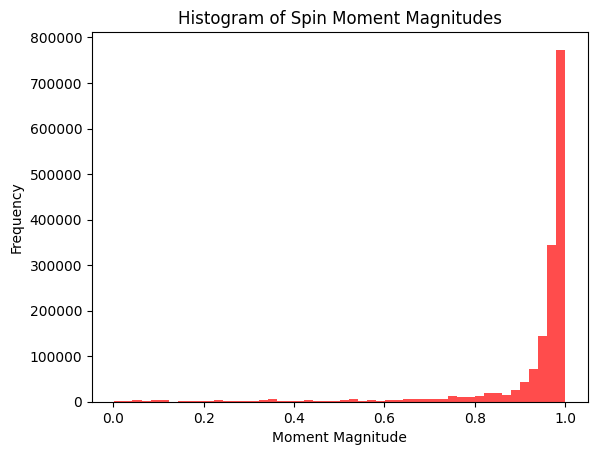

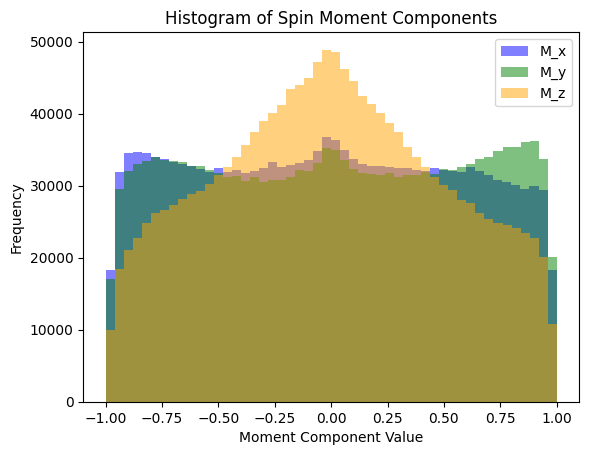

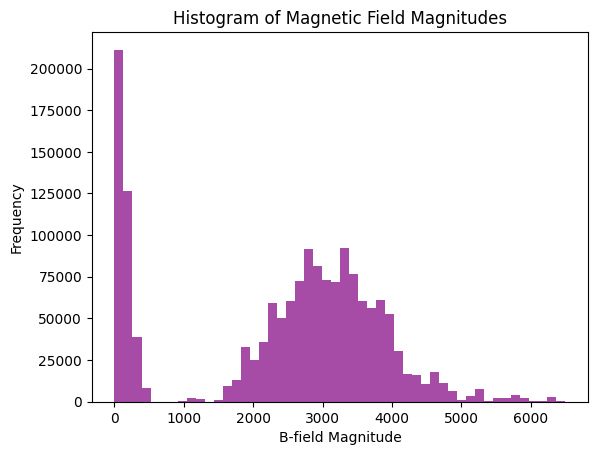

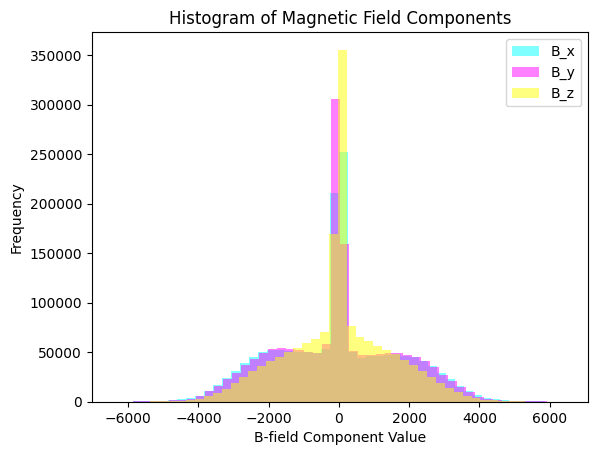

In [20]:
stats.histograms(bins=50)